In [161]:
import pathlib
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [162]:
sns.set_style("whitegrid")

In [163]:
data_folder = pathlib.Path("./fixtures").joinpath("data")

In [164]:
def get_date(date_str):
    return datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

In [165]:
# products dataset
products_df = pd.read_csv(data_folder.joinpath("products.csv"))
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           877 non-null    int64 
 1   description  877 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.8+ KB


In [166]:
orders_df = pd.read_csv(data_folder.joinpath("orders.csv"))
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           438 non-null    int64 
 1   created_at   438 non-null    object
 2   vendor_id    438 non-null    int64 
 3   customer_id  438 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.8+ KB


In [167]:
order_items_df = pd.read_csv(data_folder.joinpath("order_lines.csv"))
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             5539 non-null   int64  
 1   product_id           5539 non-null   int64  
 2   product_description  5539 non-null   object 
 3   product_price        5539 non-null   int64  
 4   product_vat_rate     5539 non-null   float64
 5   discount_rate        5539 non-null   float64
 6   quantity             5539 non-null   int64  
 7   full_price_amount    5539 non-null   int64  
 8   discounted_amount    5539 non-null   float64
 9   vat_amount           5539 non-null   float64
 10  total_amount         5539 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 476.1+ KB


In [168]:
# groupby by day
merged_order_and_item = order_items_df.merge(
    orders_df, left_on="order_id", right_on="id")
merged_order_and_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5539 entries, 0 to 5538
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             5539 non-null   int64  
 1   product_id           5539 non-null   int64  
 2   product_description  5539 non-null   object 
 3   product_price        5539 non-null   int64  
 4   product_vat_rate     5539 non-null   float64
 5   discount_rate        5539 non-null   float64
 6   quantity             5539 non-null   int64  
 7   full_price_amount    5539 non-null   int64  
 8   discounted_amount    5539 non-null   float64
 9   vat_amount           5539 non-null   float64
 10  total_amount         5539 non-null   float64
 11  id                   5539 non-null   int64  
 12  created_at           5539 non-null   object 
 13  vendor_id            5539 non-null   int64  
 14  customer_id          5539 non-null   int64  
dtypes: float64(5), int64(8), object(2)
mem

In [169]:
merged_order_and_item.head(20)

,order_id,product_id,product_description,product_price,product_vat_rate,discount_rate,quantity,full_price_amount,discounted_amount,vat_amount,total_amount,id,created_at,vendor_id,customer_id
0,2,794,IBM 032,21873,0.11,0.000000,49,1071777,1.071777e+06,117895.470000,1.189672e+06,2,2019-08-01 18:43:57.052767,3,1398
1,2,780,IBM 003,94046,0.20,0.761293,29,2727334,6.510325e+05,130206.500079,7.812390e+05,2,2019-08-01 18:43:57.052767,3,1398
2,2,521,Deskjet 995c / 995ck,47082,0.11,0.000000,20,941640,9.416400e+05,103580.400000,1.045220e+06,2,2019-08-01 18:43:57.052767,3,1398
3,2,835,A388C (Accompli 388),55162,0.00,0.000000,50,2758100,2.758100e+06,0.000000,2.758100e+06,2,2019-08-01 18:43:57.052767,3,1398
4,2,580,Officejet 330,15927,0.11,0.000000,46,732642,7.326420e+05,80590.620000,8.132326e+05,2,2019-08-01 18:43:57.052767,3,1398
5,2,365,QM3,33152,0.20,0.000000,11,364672,3.646720e+05,72934.400000,4.376064e+05,2,2019-08-01 18:43:57.052767,3,1398
6,2,417,GS8,96066,0.11,0.000000,22,2113452,2.113452e+06,232479.720000,2.345932e+06,2,2019-08-01 18:43:57.052767,3,1398
7,2,462,Deskjet 610c / 610cl,1037,0.20,0.522203,33,34221,1.635069e+04,3270.137627,1.962083e+04,2,2019-08-01 18:43:57.052767,3,1398
8,2,589,Officejet 720,98827,0.00,0.042481,30,2964810,2.838862e+06,0.000000,2.838862e+06,2,2019-08-01 18:43:57.052767,3,1398
9,2,428,XC60,76782,0.00,0.000000,30,2303460,2.303460e+06,0.000000,2.303460e+06,2,2019-08-01 18:43:57.052767,3,1398


## The total number of items sold on that day

In [170]:
# number of item sold by day
merged_order_and_item["created_at"] = pd.to_datetime(merged_order_and_item['created_at'], utc=True)
merged_order_and_item['date'] = merged_order_and_item['created_at'].dt.date
sale_day = merged_order_and_item.groupby("date")["quantity"].sum()
sale_day

date
2019-08-01    2895
2019-08-02    3082
2019-08-03    3559
2019-08-04    3582
2019-08-05    2768
2019-08-06    3431
2019-08-07    2767
2019-08-08    2643
2019-08-09    1506
2019-08-10    1443
2019-08-11    2466
2019-08-12    3482
2019-08-13    1940
2019-08-14    1921
2019-08-15    3479
2019-08-16    3053
2019-08-17    2519
2019-08-18    2865
2019-08-19    1735
2019-08-20    1250
2019-08-21    2351
2019-08-22    1366
2019-08-23    1817
2019-08-24    1992
2019-08-25    1424
2019-08-26    2059
2019-08-27    2723
2019-08-28    2485
2019-08-29    1947
2019-08-30    2460
2019-08-31    1902
2019-09-01    2699
2019-09-02    2597
2019-09-03    2970
2019-09-04    3880
2019-09-05    1901
2019-09-06    2563
2019-09-07    1737
2019-09-08    2129
2019-09-09    2548
2019-09-10    2040
2019-09-11    2634
2019-09-12    2957
2019-09-13    1569
2019-09-14    1783
2019-09-15    1595
2019-09-16    1599
2019-09-17    1949
2019-09-18    1756
2019-09-19    1884
2019-09-20    2292
2019-09-21    3263
2019-09

In [171]:
# Value for a date
# 2019-09-06
res = sale_day[get_date("2019-08-02")]
res

3082

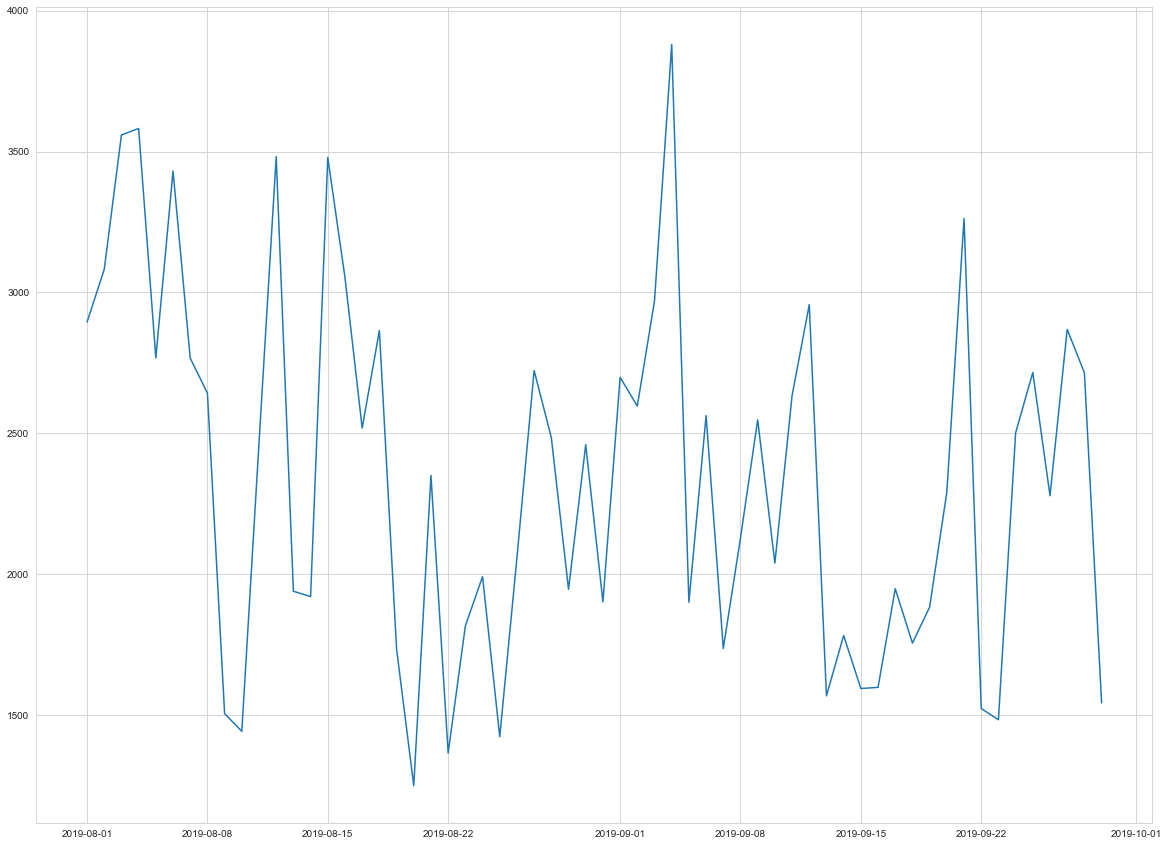

In [172]:
plt.figure(figsize=(20,15))
ax = sns.lineplot(data=sale_day)



In [173]:
px.line(x=sale_day.index, y=sale_day.values, title="Quantity sale per day")


## The total number of customers that made an order that day

In [174]:
# Unique customer per day
customers_day = merged_order_and_item.groupby("date")["customer_id"].unique()
res_unique_customer = customers_day[get_date("2019-08-02")]

TypeError: unhashable type: 'numpy.ndarray'

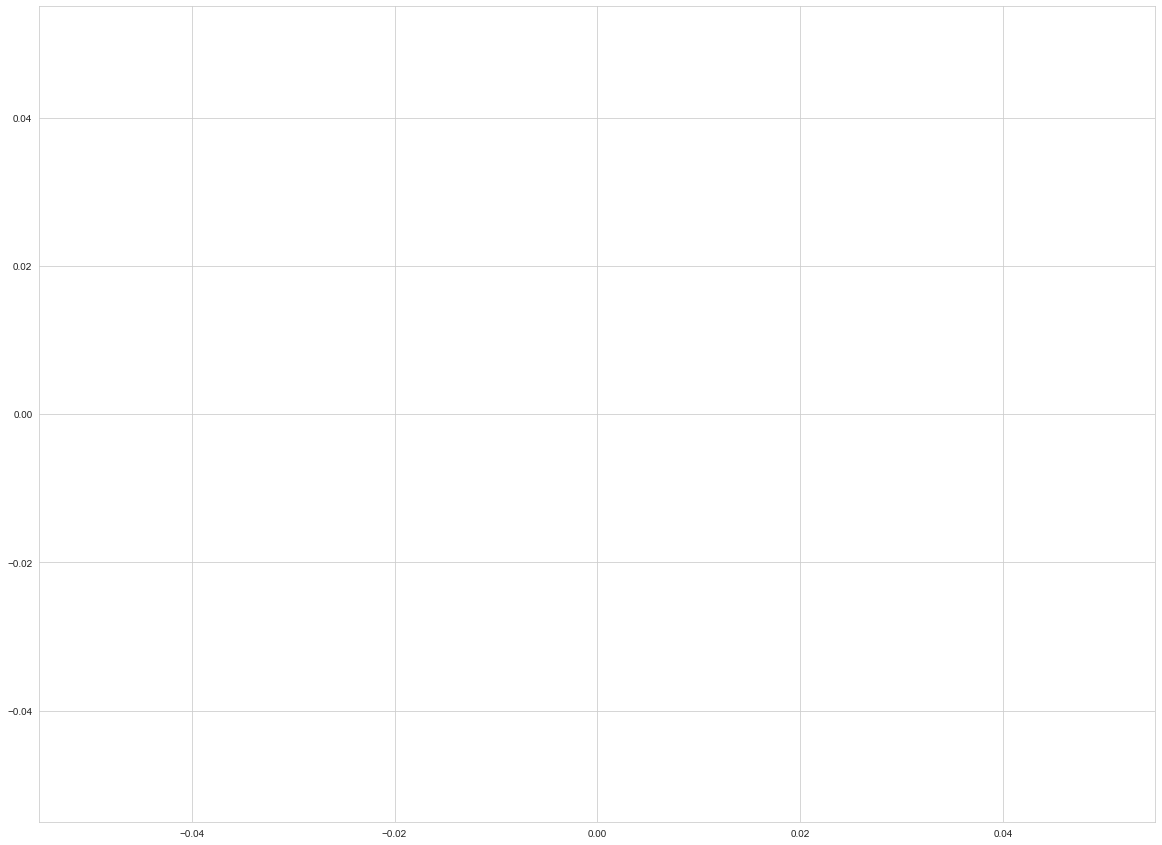

In [175]:
plt.figure(figsize=(20,15))
ax = sns.lineplot(data=customers_day, )
ax.set_title('Unique Customer per day')


## The total amount of discount given that day

In [ ]:
plt.figure(figsize=(20,15))
discounted_day = merged_order_and_item.groupby("date")["discounted_amount"].sum()
ax = sns.lineplot(data=discounted_day)
ax.set_title('Discounted amount per day')

In [ ]:
plt.figure(figsize=(20,15))
average_discount = merged_order_and_item.groupby("date")["discounted_amount"].mean()
ax = sns.lineplot(data=average_discount)
ax.set_title('Average discount amount per day')

In [ ]:
plt.figure(figsize=(20,15))
avg_order_total = merged_order_and_item.groupby("date")["total_amount"].mean()
ax = sns.lineplot(data=avg_order_total)
ax.set_title('Average total per day')